<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:center">
<h1 align="center"><font color=black> House Prices Prediction</font></h1>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

<h3 align="left"><font color=black> House Prices Prediction Using Linear Regression Model with Hyperparameter Tuning:</font></h3>
    
In this project, we're diving into Predicting house prices is a common problem in the field of real estate and data science. By leveraging historical data, we can build predictive models to estimate the selling prices of houses based on various features such as size, location, and amenities. In this section, we will develop a linear regression model to predict house prices, incorporating hyperparameter tuning to optimize the model's performance.

Linear regression is a simple yet powerful algorithm that models the relationship between a dependent variable (house prices) and one or more independent variables (features of the houses). By using hyperparameter tuning, we can systematically search for the best parameters to improve the model's accuracy and robustness. Through this approach, we aim to understand the key factors influencing house prices and generate precise predictions for new data.

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Objectives:</font></h3>

* **Explore the Dataset:** Uncover patterns, distributions, and relationships within the data.
* **Conduct Extensive Exploratory Data Analysis (EDA):** Dive deep into bivariate relationships against the target.
* **Preprocessing Steps:**
    - Remove irrelevant features
    - Address missing values
    - Treat outliers
    - Encode categorical variables
    - Transform skewed features to achieve normal-like distributions

### Model Building:
- Establish a pipeline for the linear regression model, including feature scaling.
- Implement and tune the linear regression model with hyperparameter tuning to optimize its performance.
- Emphasize achieving high accuracy and minimizing mean squared error to ensure accurate predictions of house prices.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | Data Preprocessing](#preprocessing)
    - [Step 4.1 | Data Cleaning](#Data_Cleaning)
    - [Step 4.2 | Feature Engineering](#Feature_Engineering)
    - [Step 4.3 | Outlier removal from Target Variable](#outlier)
    - [Step 4.4 | Feature Selection](#Feature_Selection)
        - [Step 4.4a | Numerical Feature Selection](#NFeature_Selection)
        - [Step 4.4b | Categorical Feature Selection](#CFeature_Selection)
* [Step 5 | Prepare test data](#Prepare_test_data)
    - [Step 5.1 | Load Test Data](#Load_td)
    - [Step 5.2 | Preprocess Test Data](#Preprocess_td)
        - [Step 5.2a |  Data Cleaning of Test Data:](#DT_Preprocess_td)
        - [Step 5.2b |  Label Encoding and Creating Dummy Variables for Categorical Test Data:](#LE_Preprocess_td)
        - [Step 5.2c |  Check Column Differences Between Test and Train Data](#CD_Preprocess_td)
* [Step 6 | Model Building](#mb)
* [Step 7 | Model Prediction Result:](#mpr)

<a id="import"></a>
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 1 | <span style="color:black ; font-style: italic;">Import Library</span> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.options.mode.chained_assignment = None

from scipy import stats
from scipy.stats import norm, skew 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

<a id="read"></a>
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 2 | <span style="color:black ; font-style: italic;">Read Dataset</span> 

In [2]:
df = pd.read_csv(r"C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\house prediction\train.csv")

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave   NaN      Reg  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal   
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0  \
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Data fields Description
Here's a brief version of what you'll find in the data description file.

- SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**We will drop the `Id` column as it is not necessary for model training.**

In [4]:
df = df.drop('Id', axis=1)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0             60       RL         65.0     8450   Pave   NaN      Reg  \
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature   
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN  \
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

<a id="overview"></a>
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 3 | <span style="color:black ; font-style: italic;">Dataset Overview</span> 

<a id="basic"></a>
# <b><span style='color:black'>Step 3.1 |</span><span style='color:black'> Dataset Basic Information</span></b>

In [5]:
df.info()
print()
for i in ['float64','int64','O']:
    df_num = df.select_dtypes(include = i)
    print(f'Number of columns of Data Type {i}',len(df_num.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Check Duplicates

In [6]:
df.duplicated().sum()

0

## Check Null values

In [7]:
count_of_columns_with_nullvalue = 0
for i in df.columns:
    if df[i].isna().sum()>0:
        count_of_columns_with_nullvalue +=1
print('Count of Columns with Null value: ', count_of_columns_with_nullvalue)

Count of Columns with Null value:  19


## Inferences:
* Number of Entries: The dataset consists of `1460 entries`, ranging from `index 0 to 1459`.
* Columns: There are `80` columns in the dataset corresponding to various attributes of the house.
* Data Types:
    * `3 columns` is of the `Float data type`.
    * `34 Columns` in Dataset are of the `integer data type`.
    * `43 Columns` in Dataset are of the `character data type`.
* Missing Values: There appear to be 19 columns with missing values in the dataset.
* Found no Duplicate Row in the Dataset.

<a id="num_statistics"></a>
# <b><span style='color: black'>Step 3.2 |</span><span style='color:black'> Summary Statistics for Numerical Variables</span></b>

### 3.2.a | Describing the Data Distribution of Numerical Columns ranging from 1 Percentile to 99 Percentile.

In [8]:
# df.describe(percentile(0.1, 0.67))

In [9]:
def Data_Distribution(df):
    global numerical_features
    numerical_features = df.select_dtypes(include = 'number')

    df_summary = pd.DataFrame(columns = ['variables', 'Missing','Missing_Percentage', 'Min', 'p1', 'p5', 'p10' , 'p25', 'p50', 
                                         'Mean', 'p75', 'p90', 'p95', 'p99' , 'Max', 'Sum'])

    for i in list(numerical_features.columns):
        variable = i
        Missing = df[i].isna().sum()
        Missing_Percentage = Missing/df.shape[0]*100
        Min = np.min(df[i])
        p1 = np.nanpercentile(df[i], 1)
        p5 = np.nanpercentile(df[i], 5)
        p10 = np.nanpercentile(df[i], 10)
        p25 = np.nanpercentile(df[i], 25)
        p50 = np.nanpercentile(df[i], 50)
        Mean = np.mean(df[i])
        p75 = np.nanpercentile(df[i], 75)
        p90 = np.nanpercentile(df[i], 90)
        p95 = np.nanpercentile(df[i], 95)
        p99 = np.nanpercentile(df[i], 99)
        Max = np.max(df[i])
        Sum = np.sum(df[i])
        dic = dict(zip(df_summary.columns, [variable,Missing, Missing_Percentage, Min, p1, p5, p10, p25, p50, Mean, p75, p90, p95, p99, Max, Sum]))
        df_summary.loc[len(df_summary)]=[variable,Missing, Missing_Percentage, Min, p1, p5, p10, p25, p50, Mean, p75, p90, p95, p99, Max, Sum]

    return df_summary
Data_Distribution(df)

variables  Missing  Missing_Percentage      Min        p1        p5   
0      MSSubClass        0            0.000000     20.0     20.00     20.00  \
1     LotFrontage      259           17.739726     21.0     21.00     34.00   
2         LotArea        0            0.000000   1300.0   1680.00   3311.70   
3     OverallQual        0            0.000000      1.0      3.00      4.00   
4     OverallCond        0            0.000000      1.0      3.00      4.00   
5       YearBuilt        0            0.000000   1872.0   1899.18   1916.00   
6    YearRemodAdd        0            0.000000   1950.0   1950.00   1950.00   
7      MasVnrArea        8            0.547945      0.0      0.00      0.00   
8      BsmtFinSF1        0            0.000000      0.0      0.00      0.00   
9      BsmtFinSF2        0            0.000000      0.0      0.00      0.00   
10      BsmtUnfSF        0            0.000000      0.0      0.00      0.00   
11    TotalBsmtSF        0            0.000000      0.0      0.00    519.30   
12       1stFlrSF        0            0.000000    334.0    520.00    672.95   
13       2ndFlrSF        0            0.000000      0.0      0.00      0.00   
14   LowQualFinSF        0            0.000000      0.0      0.00      0.00   
15      GrLivArea        0            0.000000    334.0    692.18    848.00   
16   BsmtFullBath        0            0.000000      0.0      0.00      0.00   
17   BsmtHalfBath        0            0.000000      0.0      0.00      0.00   
18       FullBath        0            0.000000      0.0      1.00      1.00   
19       HalfBath        0            0.000000      0.0      0.00      0.00   
20   BedroomAbvGr        0            0.000000      0.0      1.00      2.00   
21   KitchenAbvGr        0            0.000000      0.0      1.00      1.00   
22   TotRmsAbvGrd        0            0.000000      2.0      3.00      4.00   
23     Fireplaces        0            0.000000      0.0      0.00      0.00   
24    GarageYrBlt       81            5.547945   1900.0   1916.00   1930.00   
25     GarageCars        0            0.000000      0.0      0.00      0.00   
26     GarageArea        0            0.000000      0.0      0.00      0.00   
27     WoodDeckSF        0            0.000000      0.0      0.00      0.00   
28    OpenPorchSF        0            0.000000      0.0      0.00      0.00   
29  EnclosedPorch        0            0.000000      0.0      0.00      0.00   
30      3SsnPorch        0            0.000000      0.0      0.00      0.00   
31    ScreenPorch        0            0.000000      0.0      0.00      0.00   
32       PoolArea        0            0.000000      0.0      0.00      0.00   
33        MiscVal        0            0.000000      0.0      0.00      0.00   
34         MoSold        0            0.000000      1.0      1.00      2.00   
35         YrSold        0            0.000000   2006.0   2006.00   2006.00   
36      SalePrice        0            0.000000  34900.0  61815.97  88000.00   

         p10        p25       p50           Mean        p75       p90   
0       20.0      20.00      50.0      56.897260      70.00     120.0  \
1       44.0      59.00      69.0      70.049958      80.00      96.0   
2     5000.0    7553.50    9478.5   10516.828082   11601.50   14381.7   
3        5.0       5.00       6.0       6.099315       7.00       8.0   
4        5.0       5.00       5.0       5.575342       6.00       7.0   
5     1924.9    1954.00    1973.0    1971.267808    2000.00    2006.0   
6     1950.0    1967.00    1994.0    1984.865753    2004.00    2006.0   
7        0.0       0.00       0.0     103.685262     166.00     335.0   
8        0.0       0.00     383.5     443.639726     712.25    1065.5   
9        0.0       0.00       0.0      46.549315       0.00     117.2   
10      74.9     223.00     477.5     567.240411     808.00    1232.0   
11     636.9     795.75     991.5    1057.429452    1298.25    1602.2   
12     756.9     882.00    1087.0    1162.626712    1391

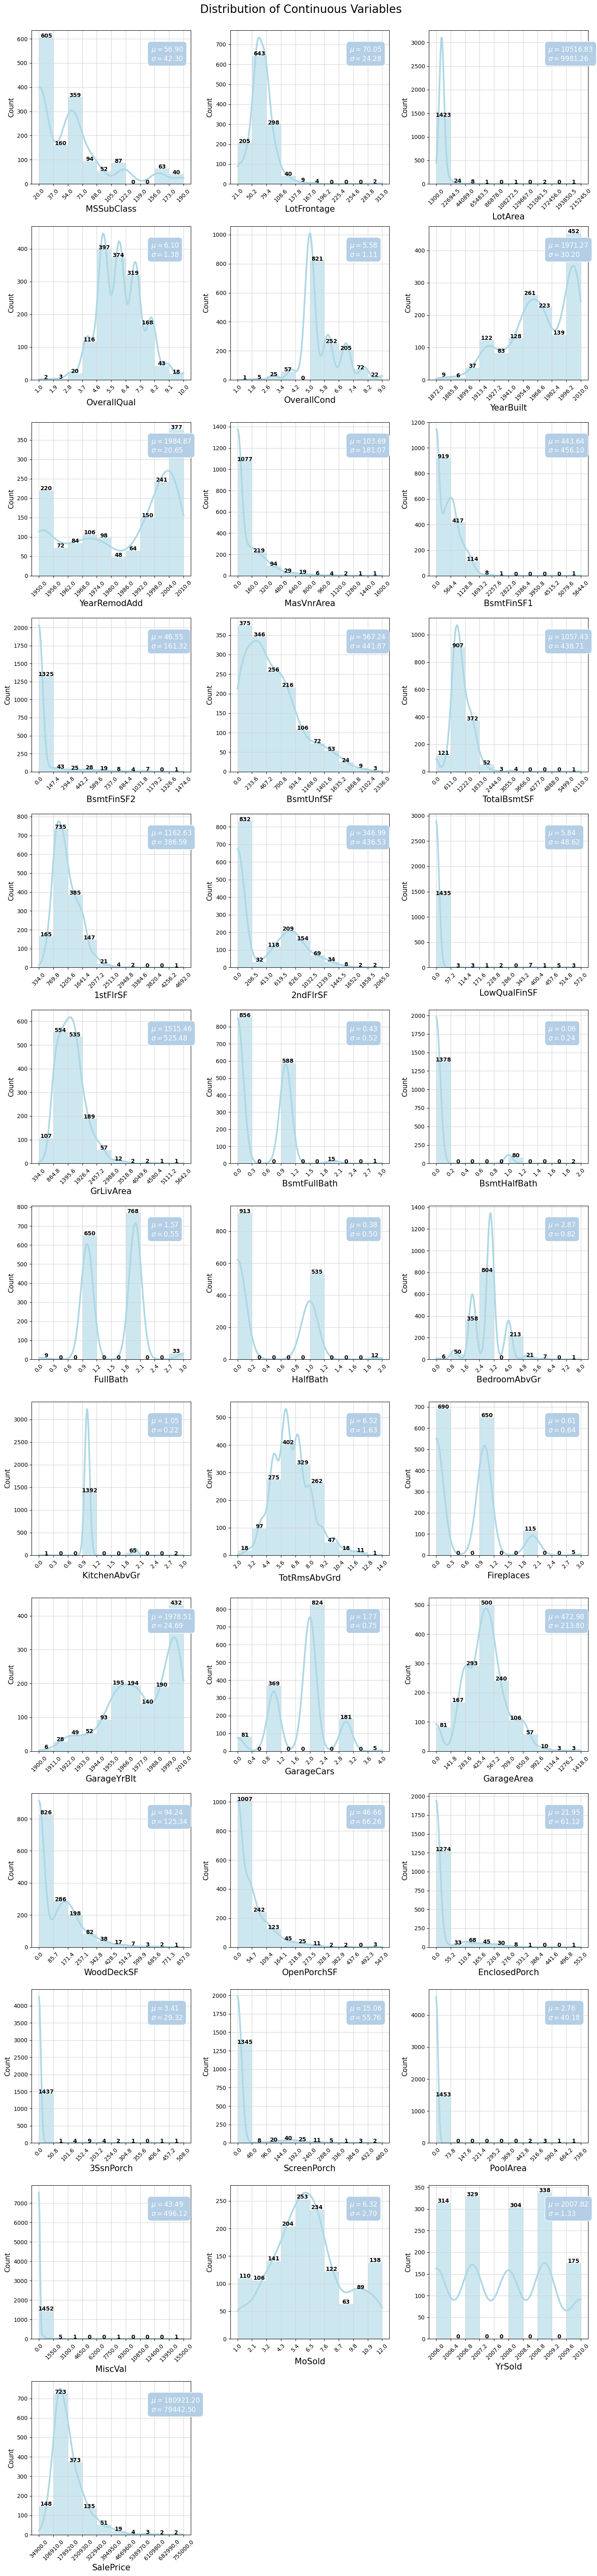

In [10]:
def Numerical_data_distribution_plot(numerical_features):
    # Calculate the number of rows and columns for the subplot grid
    num_features = len(numerical_features.columns)
    num_rows = math.ceil(num_features / 3)
    num_cols = min(num_features, 3)

    # Set up the subplot
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

    # Loop to plot histograms for each continuous feature
    for i, col in enumerate(numerical_features.columns):
        x = i // num_cols
        y = i % num_cols
        values, bin_edges = np.histogram(numerical_features[col], 
                                         range=(np.floor(numerical_features[col].min()), np.ceil(numerical_features[col].max())))

        graph = sns.histplot(data=numerical_features, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                             edgecolor='none', color='lightblue', alpha=0.6, line_kws={'lw': 3})
        ax[x, y].set_xlabel(col, fontsize=15)
        ax[x, y].set_ylabel('Count', fontsize=12)
        ax[x, y].set_xticks(np.round(bin_edges, 1))
        ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
        ax[x, y].grid(color='lightgrey')

        for j, p in enumerate(graph.patches):
            ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                              ha='center', fontsize=10, fontweight="bold")

        textstr = '\n'.join((
            r'$\mu=%.2f$' % numerical_features[col].mean(),
            r'$\sigma=%.2f$' % numerical_features[col].std()
        ))
        ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                      color='white', bbox=dict(boxstyle='round', facecolor='#b3cee5', edgecolor='white', pad=0.5))

    # Hide empty subplots
    for i in range(num_features, num_rows * num_cols):
        ax.flatten()[i].axis('off')

    plt.suptitle('Distribution of Continuous Variables', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=.97)
    plt.show()
Numerical_data_distribution_plot(numerical_features)

### 3.2.b | Finding Outliers present in Numerical Variables

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [11]:
def Outlier(df):
    continuous_features = df.select_dtypes(include = 'number').columns
    Q1 = df[continuous_features].quantile(0.25)
    Q3 = df[continuous_features].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

    print("Number of outliers for each feature:\n",outliers_count_specified)
    print("Sum of outliers for each feature in DataFrame:", outliers_count_specified.sum())

Outlier(df)

Number of outliers for each feature:
 MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        0
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64
Sum of outliers for each feature in DataFrame: 1657


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">
    
**Outliers can have a significant effect on regression analysis**. Outliers are data points that deviate significantly from the rest of the data in the dataset. In regression analysis, outliers can impact the model in several ways:

* __`Influence on Regression Coefficients`__: Outliers can unduly influence the estimated coefficients of the regression model. Since regression aims to minimize the sum of squared errors, outliers with large residuals can disproportionately affect the regression coefficients, pulling them towards themselves.
* __`Impact on Model Fit`__: Outliers can lead to a poor fit of the regression model to the data. If the outliers represent errors in the data or anomalies that are not representative of the underlying relationship between the variables, including them in the analysis can result in a model that does not accurately capture the true relationship.
* __`Violation of Assumptions`__: Outliers can violate the assumptions of regression analysis, such as the assumption of homoscedasticity (constant variance of errors) and normality of errors. This can lead to biased parameter estimates and inaccurate inference.
* __`Decreased Predictive Accuracy`__: Outliers can reduce the predictive accuracy of the regression model, especially if they represent unusual or rare cases that are not representative of the typical data distribution. Including outliers in the model can lead to overfitting and poor generalization to new data.

Overall, while outliers can have a significant effect on regression analysis, careful handling and consideration of outliers can help improve the accuracy and reliability of the Model.
    
**Outlier treatment will be conducted in a further step of the Data Processing.**

<a id="cat_statistics"></a>
# <b><span style='color: black'>Step 3.3 |</span><span style='color:black'> Summary Statistics for Categorical  Variables</span></b>

In [12]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

<a id="preprocessing"></a>
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 4 | <span style="color:black ; font-style: italic;">Data Preprocessing</span> 

<a id="Data_Cleaning"></a>
# <b><span style='color: black'>Step 4.1 |</span><span style='color:black'> Data Cleaning</span></b>

## Finding null values in Data:

In [13]:
def Null_Values(df):
    global l
    l = []
    for i in df.columns:
        if df[i].isna().sum()>0:
            print(f'Number of null values in columns {i}' ,df[i].isna().sum())
            l.append(i)
    if not l:
        print('No Null columns')
Null_Values(df)

Number of null values in columns LotFrontage 259
Number of null values in columns Alley 1369
Number of null values in columns MasVnrType 872
Number of null values in columns MasVnrArea 8
Number of null values in columns BsmtQual 37
Number of null values in columns BsmtCond 37
Number of null values in columns BsmtExposure 38
Number of null values in columns BsmtFinType1 37
Number of null values in columns BsmtFinType2 38
Number of null values in columns Electrical 1
Number of null values in columns FireplaceQu 690
Number of null values in columns GarageType 81
Number of null values in columns GarageYrBlt 81
Number of null values in columns GarageFinish 81
Number of null values in columns GarageQual 81
Number of null values in columns GarageCond 81
Number of null values in columns PoolQC 1453
Number of null values in columns Fence 1179
Number of null values in columns MiscFeature 1406


## Filling missing values:

In [14]:
def fill_missing_values(df):
    
    # Replaced MiscFeature NAN value with None where MiscVal is 0.
    df.MiscFeature.loc[list((df[(df.MiscVal == 0)&(df.MiscFeature.isna() == True)]).index)] = 'None'
    
    # Fill missing values in 'Fence' column with 'No Fence'
    df['Fence'].fillna('No Fence', inplace=True)
    
    # Fill missing values in 'FireplaceQu' column with 'No Fireplace'
    print('Number of Null values in FireplaceQu:',df['FireplaceQu'].isna().sum())
    print('Values in ',df['FireplaceQu'].value_counts())
    print('\nValues in Fireplaces columns where FireplaceQu is Null:',
      df[df['FireplaceQu'].isna()==True]['Fireplaces'].value_counts())
    df['FireplaceQu'].fillna('No Fireplace', inplace=True)
    
    # Fill missing values in 'Alley' column with 'No alley access'
    df['Alley'].fillna('No alley access', inplace=True)
    
    No_Masonry_veneer = df[df['MasVnrType'].isna()==True]
    df['MasVnrType'].loc[list((No_Masonry_veneer).index)] = 'None'
    df['MasVnrArea'].loc[list((No_Masonry_veneer).index)] = 0
    
    # Electrical and KitchenQual: Mode
    df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    
    # LotFrontage: Since the area of each street connected to the house property most likely have a similar area to
    # other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
fill_missing_values(df)

Number of Null values in FireplaceQu: 690
Values in  FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

Values in Fireplaces columns where FireplaceQu is Null: Fireplaces
0    690
Name: count, dtype: int64


## Treating Columns MiscVal:

In [15]:
# Corrected data of MiscVal where it was 0 for some MiscFeature column categories (Shed, Othr)
MiscFeature_Othr = df[(df.MiscFeature=='Othr')]['MiscVal']
df['MiscVal'].loc[list((MiscFeature_Othr[MiscFeature_Othr==0]).index)] = int(MiscFeature_Othr[MiscFeature_Othr>0])

MiscFeature_Shed = df[(df.MiscFeature=='Shed')]['MiscVal']
df['MiscVal'].loc[list((MiscFeature_Shed[MiscFeature_Shed==0]).index)] = int(MiscFeature_Shed.head().mean())

## Treating Columns related Basement:

In [16]:
df[df.BsmtQual.isna() == True][['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2   
17        NaN      NaN          NaN          NaN           0          NaN  \
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
17             0          0            0  
39             0          0            0  
90             0          0            0  
102            0          0            0  
156            0          0            0  
182            0          0            0  
259            0          0            0  
342            0          0            0  
362            0          0            0  
371            0          0            0  
392            0          0            0  
520            0          0            0  
532            0          0            0  
533            0          0            0  
553            0          0            0  
646            0          0            0  
705            0          0            0  
736            0          0            0  
749            0          0            0  
778            0          0            0  
868            0          0            0  
894            0          0            0  
897            0          0            0  
984            0          0            0  
100

**The `Basement` function is designed to handle missing basement-related data in the dataset. It identifies rows where the `BsmtQual` column has missing values, and for those rows, it assigns the value 'No Basement' to all relevant basement feature columns (`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, and `BsmtFinType2`). This ensures a consistent representation of houses without basements.**

In [17]:
def Basement(df):
    x = df[df['BsmtQual'].isna()==True].index
    for i in ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        df[i].loc[list(x)] = 'No Basement'
        
Basement(df)

In [18]:
def null_basement(df,column):
    print(df[column].isna().sum())

    print(df[df[column].isna() == True
            ][['BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']])
null_basement(df,'BsmtFinType2')

1
    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2   
332       Gd       TA           No          GLQ        1124          NaN  \

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
332         479       1603         3206  


In [19]:
df[(df.BsmtFinSF2>0)&(df.BsmtUnfSF>1000)][['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2   
330        TA       TA           No          GLQ          40          Rec  \
332        Gd       TA           No          GLQ        1124          NaN   
759        Gd       TA           Av          LwQ          56          ALQ   
888        TA       Gd           Gd          ALQ         351          Rec   
1205       Gd       TA           Mn          ALQ         485          BLQ   
1346       TA       TA           No          BLQ         297          Rec   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
330          264       1424         1728  
332          479       1603         3206  
759           64       1198         1318  
888          823       1043         2217  
1205         177       1496         2158  
1346          68       1203         1568

In [20]:
df[(df.BsmtQual=='Gd')&(df.BsmtCond=='TA')&(df.BsmtFinType1=='Unf')&(df.BsmtFinType2=='Unf')&(df.BsmtUnfSF==936)][['BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2   
948        Gd       TA          NaN          Unf           0          Unf  \
1433       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
948            0        936          936  
1433           0        936          936

In [21]:
df['BsmtFinType2'] = df.BsmtFinType2.fillna('Rec', axis=0)
df['BsmtExposure'] = df.BsmtExposure.fillna('No', axis=0)

In [22]:
Null_Values(df)
print()
for i in l:
    print(df[i].value_counts())
    print()

Number of null values in columns GarageType 81
Number of null values in columns GarageYrBlt 81
Number of null values in columns GarageFinish 81
Number of null values in columns GarageQual 81
Number of null values in columns GarageCond 81
Number of null values in columns PoolQC 1453

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64



In [23]:
def Garage(df):
    x = df[df['GarageType'].isna()==True].index
    for i in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        df[i].loc[list(x)] = 'No Garage'
    df['GarageYrBlt'].loc[list(x)] = 0 
Garage(df)

**Dropping PoolQC due to high volume of Null data**

In [24]:
df = df.drop('PoolQC', axis=1)

**Cleaned all the columns with null values. Next, we will perform feature engineering and remove Outlier from Target Variable.**

<a id="Feature_Engineering"></a>
# <b><span style='color: black'>Step 4.2 |</span><span style='color:black'> Feature Engineering</span></b>

In [25]:
def preprocess_data(df):
    # Add a 'Fence_Flag' feature to provide insights. Remove 'Fence' feature due to predominant 'No fence' category.
    df['Fence_Flag'] = df['Fence'].apply(lambda x: 0 if x == 'No Fence' else 1)

    # Add feature total area of basement, first and second floor areas of each house. Adding total sqfootage feature.
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Add feature number of Garage built year from now.
    df['GarageNoYrBlt'] = 2024 - df['GarageYrBlt']

    # Correct data where houses do not have a garage; replaced the value '2024' in 'GarageNoYrBlt' with '0'.
    df['GarageNoYrBlt'] = df['GarageNoYrBlt'].replace({2024: 0})
    
    # Drop the 'GarageYrBlt' and 'Fence' columns
    df.drop(['GarageYrBlt', 'Fence'], axis=1, inplace = True)
preprocess_data(df)

**Transforming some numerical variables that are really categorical**
- MSSubClass: The building class
- Changing OverallCond into a categorical variable.
- Year and month sold are transformed into categorical features.

In [26]:
for i in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    df[i] = df[i].apply(str)

<a id="outlier"></a>
# <b><span style='color: black'>Step 4.3 |</span><span style='color:black'> Outlier removal from Target Variable</span></b>

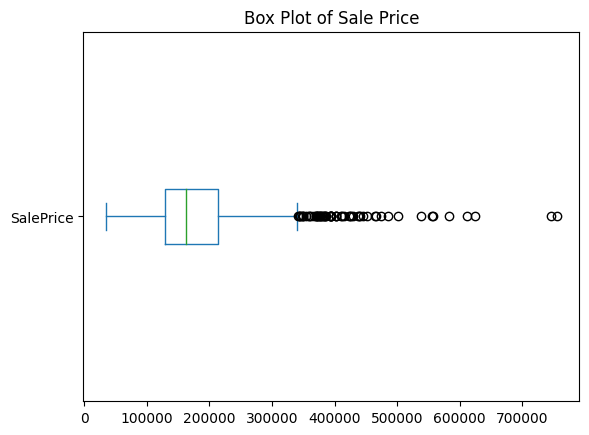

In [27]:
df['SalePrice'].plot(kind = 'box',vert=False)
plt.title('Box Plot of Sale Price')
plt.show()

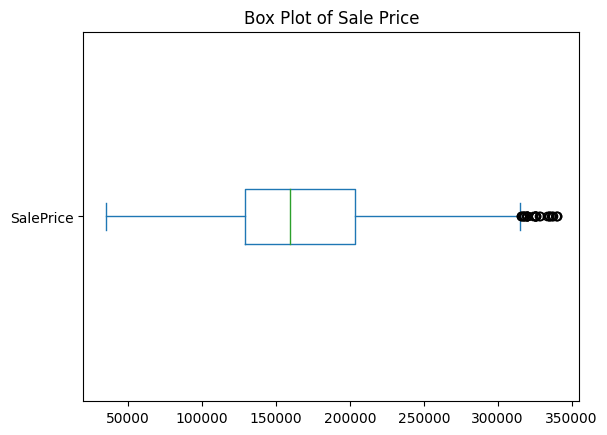

In [28]:
def remove_outliers(df, column):
    # Calculate quartiles and IQR for the specified column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers in the specified column
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Remove outliers in the 'SalePrice' column
df_filtered = remove_outliers(df, 'SalePrice')

# Plot box plot of 'SalePrice' in the filtered DataFrame
import matplotlib.pyplot as plt
df_filtered['SalePrice'].plot(kind='box', vert=False)
plt.title('Box Plot of Sale Price')
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

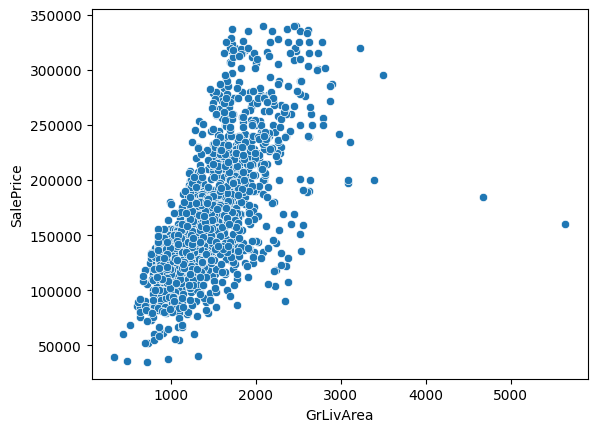

In [29]:
sns.scatterplot(y=df_filtered['SalePrice'],x=df_filtered['GrLivArea'])

In [30]:
df_filtered=df_filtered.drop(df_filtered[(df_filtered['GrLivArea']>4000) & (df_filtered['SalePrice']<300000)].index)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

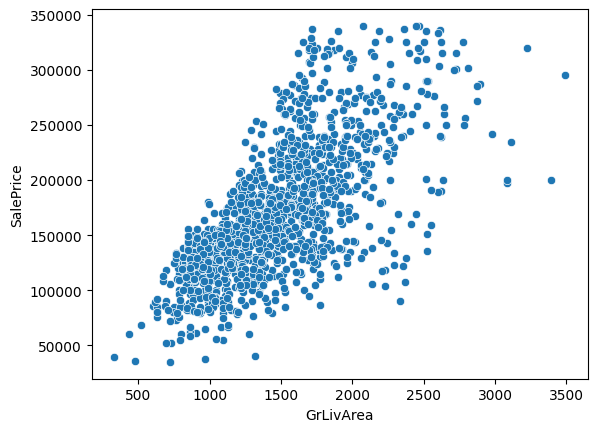

In [31]:
sns.scatterplot(y=df_filtered['SalePrice'],x=df_filtered['GrLivArea'])

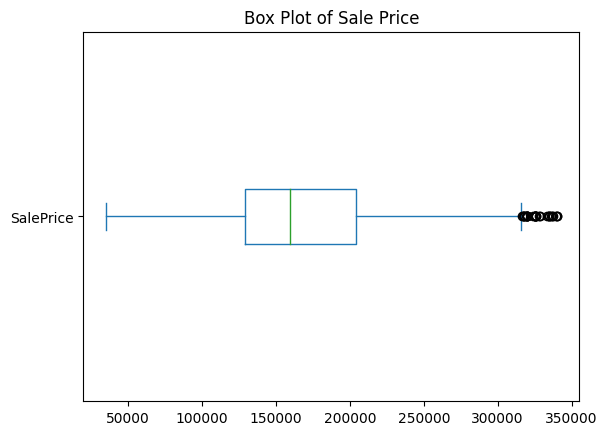

In [32]:
df_filtered['SalePrice'].plot(kind='box', vert=False)
plt.title('Box Plot of Sale Price')
plt.show()

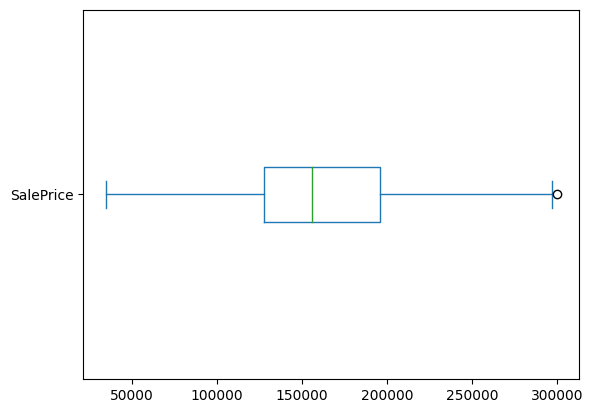

In [33]:
Sales_outlier = df_filtered[df_filtered['SalePrice']>300500]
df_filtered.drop(Sales_outlier.index,axis=0,inplace=True)
df_filtered['SalePrice'].plot(kind='box', vert=False)
plt.show()

In [34]:
Outlier(df_filtered)

Number of outliers for each feature:
 LotFrontage       94
LotArea           65
OverallQual        2
YearBuilt          6
YearRemodAdd       0
MasVnrArea       109
BsmtFinSF1         1
BsmtFinSF2       163
BsmtUnfSF         14
TotalBsmtSF       49
1stFlrSF          18
2ndFlrSF           1
LowQualFinSF      25
GrLivArea         20
BsmtFullBath       1
BsmtHalfBath      79
FullBath           0
HalfBath           0
BedroomAbvGr      32
KitchenAbvGr      68
TotRmsAbvGrd      15
Fireplaces         2
GarageCars         5
GarageArea        10
WoodDeckSF        35
OpenPorchSF       82
EnclosedPorch    202
3SsnPorch         21
ScreenPorch      105
PoolArea           5
MiscVal           54
SalePrice          1
Fence_Flag       276
TotalSF           14
GarageNoYrBlt      0
dtype: int64
Sum of outliers for each feature in DataFrame: 1574



 mu = 164234.08 and sigma = 52110.93



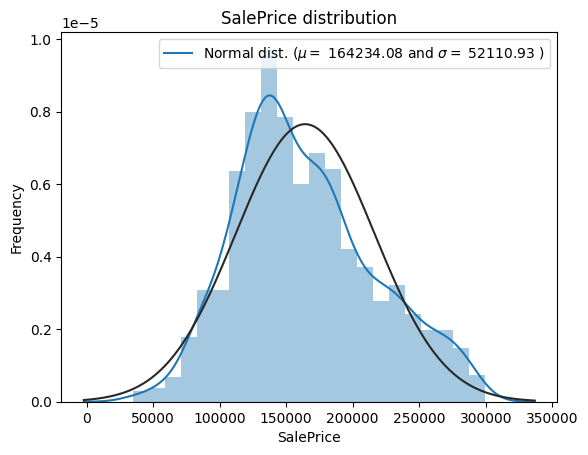

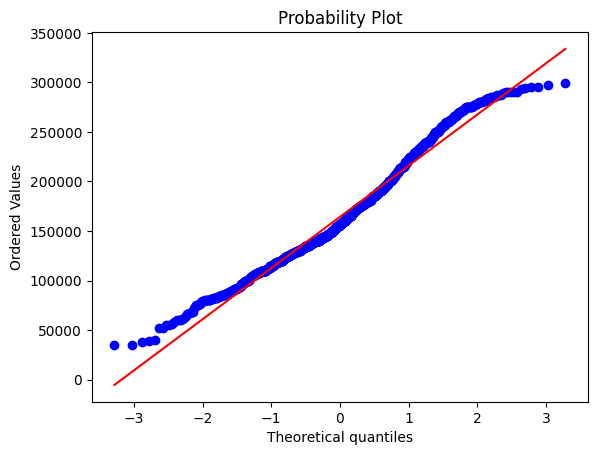

In [35]:
def Skew_plot(df_filtered):
    sns.distplot(df_filtered['SalePrice'] , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df_filtered['SalePrice'])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(df_filtered['SalePrice'], plot=plt)
    plt.show()
    
Skew_plot(df_filtered)

**The skew seems correct and the data appears normally distributed.**

<a id="Feature_Selection"></a>
# <b><span style='color: black'>Step 4.4 |</span><span style='color:black'> Feature Selection</span></b>

<a id="NFeature_Selection"></a>
## <b><span style='color: black'>Step 4.4a |</span><span style='color:black'> Numerical Feature Selection</span></b>

In [36]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_filtered[c].values)) 
    df_filtered[c] = lbl.transform(list(df_filtered[c].values))

# shape        
print('Shape all_data: {}'.format(df_filtered.shape))
numerical_features = df_filtered.select_dtypes(include = 'number')
numerical_features.columns

Shape all_data: (1343, 80)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Fence_Flag', 'TotalSF',
       'GarageNoYrBlt'],
      dtype='object')

## Numerical variable Feature Importance (Absolute Coefficients) using LinearRegression:

In [37]:
X = numerical_features.drop('SalePrice', axis=1)
y = numerical_features['SalePrice']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (feature importances)
feature_importance = pd.Series(model.coef_, index=X.columns)

# Sort the feature importances in descending order
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

# Display the sorted feature importances
feature_importance_df_1 = pd.DataFrame({'Feature': feature_importance_sorted.index, 'Importance': feature_importance_sorted.values})

# Sum of the total feature importance
print("Sum of total feature importances of LinearRegression model:", feature_importance_df_1['Importance'].sum()*100)

# Sum of the top 37 feature importances
print("Sum of top 37 feature importances of LinearRegression model:", feature_importance_df_1.head(32)['Importance'].sum()*100)
print("\nFeature Importance (Absolute Coefficients):")
feature_importance_df_1.head(32)

Sum of total feature importances of LinearRegression model: 12373245.326505676
Sum of top 37 feature importances of LinearRegression model: 12311614.84509203

Feature Importance (Absolute Coefficients):


Feature    Importance
0         Street  39935.077828
1   KitchenAbvGr  18960.591633
2    OverallQual   7885.302140
3      ExterQual   5487.151642
4    OverallCond   5090.003620
5    KitchenQual   5019.288160
6     Fireplaces   4886.868428
7   BsmtHalfBath   4364.705095
8          Alley   4074.934311
9     Functional   3580.728526
10    GarageCars   2735.790252
11  BedroomAbvGr   2654.500696
12  BsmtFullBath   2222.820454
13      FullBath   1918.921321
14    Fence_Flag   1694.940765
15      BsmtQual   1446.534402
16     ExterCond   1332.328158
17     HeatingQC   1302.401834
18     LandSlope   1297.570856
19  TotRmsAbvGrd   1132.925753
20   FireplaceQu   1078.912701
21      LotShape    844.432599
22  GarageFinish    574.248857
23    MSSubClass    529.954796
24    PavedDrive    484.157022
25        YrSold    476.827658
26    GarageQual    450.163628
27      HalfBath    408.658765
28        MoSold    386.260620
29  BsmtFinType2    381.380675
30     YearBuilt    316.714503
31  BsmtExposure    161.050751

## Numerical variable Feature Importances using Random Forest Regressor model:

In [38]:
# Train Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset index after sorting
feature_importance_df.reset_index(drop=True, inplace=True)

# Sum of the total feature importance
print("Sum of total feature importances of Random Forest Regressor model:", feature_importance_df['Importance'].sum()*100)

# Sum of the top 37 feature importances
print("Sum of top 37 feature importances of Random Forest Regressor model:", feature_importance_df.head(37)['Importance'].sum()*100)
feature_importance_df_37 = feature_importance_df.head(37)
feature_importance_df_37

Sum of total feature importances of Random Forest Regressor model: 99.99999999999999
Sum of top 37 feature importances of Random Forest Regressor model: 98.47633799266215


Feature  Importance
0         TotalSF    0.479729
1     OverallQual    0.224902
2       YearBuilt    0.039473
3         LotArea    0.021702
4      GarageArea    0.018963
5       GrLivArea    0.017221
6    YearRemodAdd    0.017086
7       ExterQual    0.016270
8       BsmtUnfSF    0.013014
9     OverallCond    0.011970
10     BsmtFinSF1    0.011561
11     GarageCars    0.008536
12       2ndFlrSF    0.008171
13    LotFrontage    0.007656
14     Fireplaces    0.007622
15       1stFlrSF    0.006830
16  GarageNoYrBlt    0.006294
17    KitchenQual    0.005973
18    TotalBsmtSF    0.005684
19     CentralAir    0.005627
20    OpenPorchSF    0.004982
21     MSSubClass    0.004566
22     WoodDeckSF    0.004130
23         MoSold    0.003949
24   BsmtFinType1    0.003735
25     MasVnrArea    0.003729
26   GarageFinish    0.003701
27       LotShape    0.003190
28     Functional    0.002904
29   KitchenAbvGr    0.002274
30         YrSold    0.002212
31    FireplaceQu    0.001990
32       BsmtQual    0.001941
33   BsmtExposure    0.001913
34   BedroomAbvGr    0.001886
35   TotRmsAbvGrd    0.001788
36      HeatingQC    0.001587

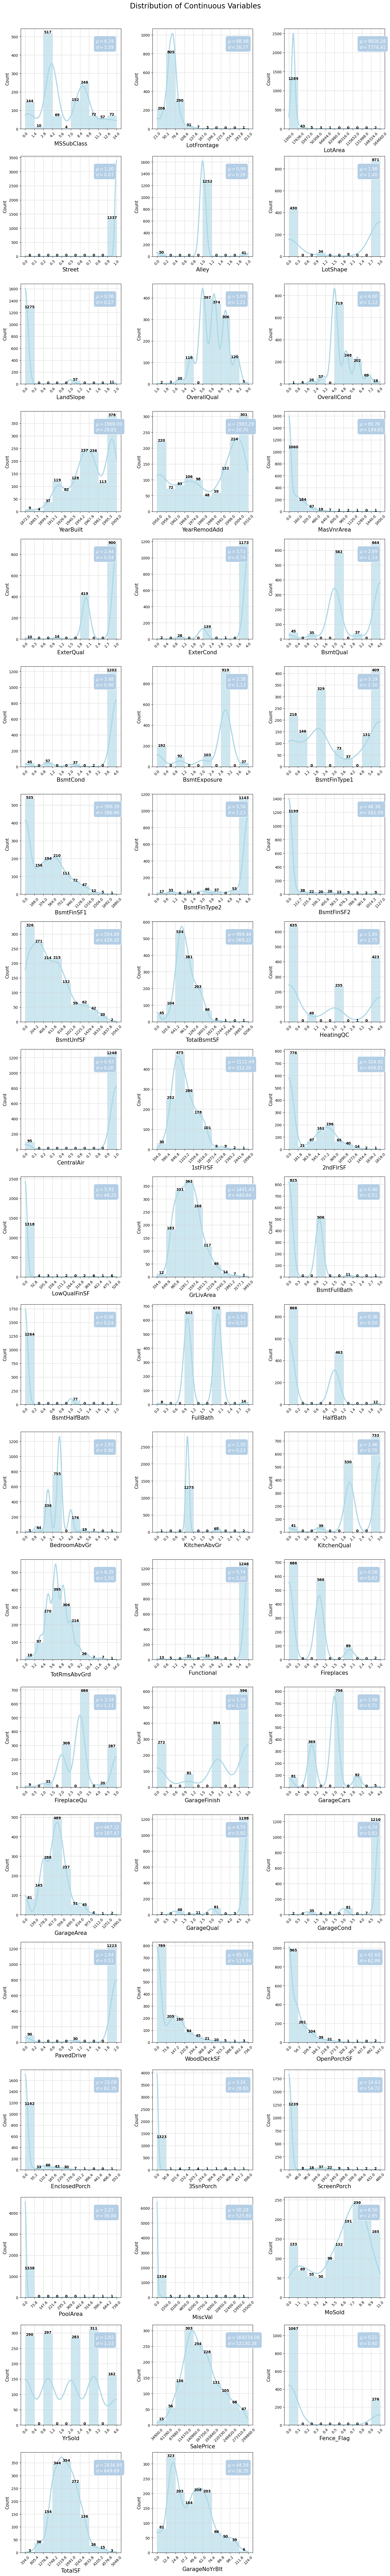

In [39]:
Numerical_data_distribution_plot(numerical_features)

In [40]:
numeric_feats = df_filtered.dtypes[df_filtered.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_filtered[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(16)


Skew in numerical features: 



Skew
MiscVal        22.506174
PoolArea       16.804668
LotArea        12.209133
3SsnPorch      10.736046
LowQualFinSF    8.804119
LandSlope       4.948918
KitchenAbvGr    4.273242
ScreenPorch     4.174961
BsmtHalfBath    3.996959
BsmtFinSF2      3.987023
MasVnrArea      3.043181
EnclosedPorch   2.995971
OpenPorchSF     2.403999
LotFrontage     1.716041
WoodDeckSF      1.596855
Fence_Flag      1.457605

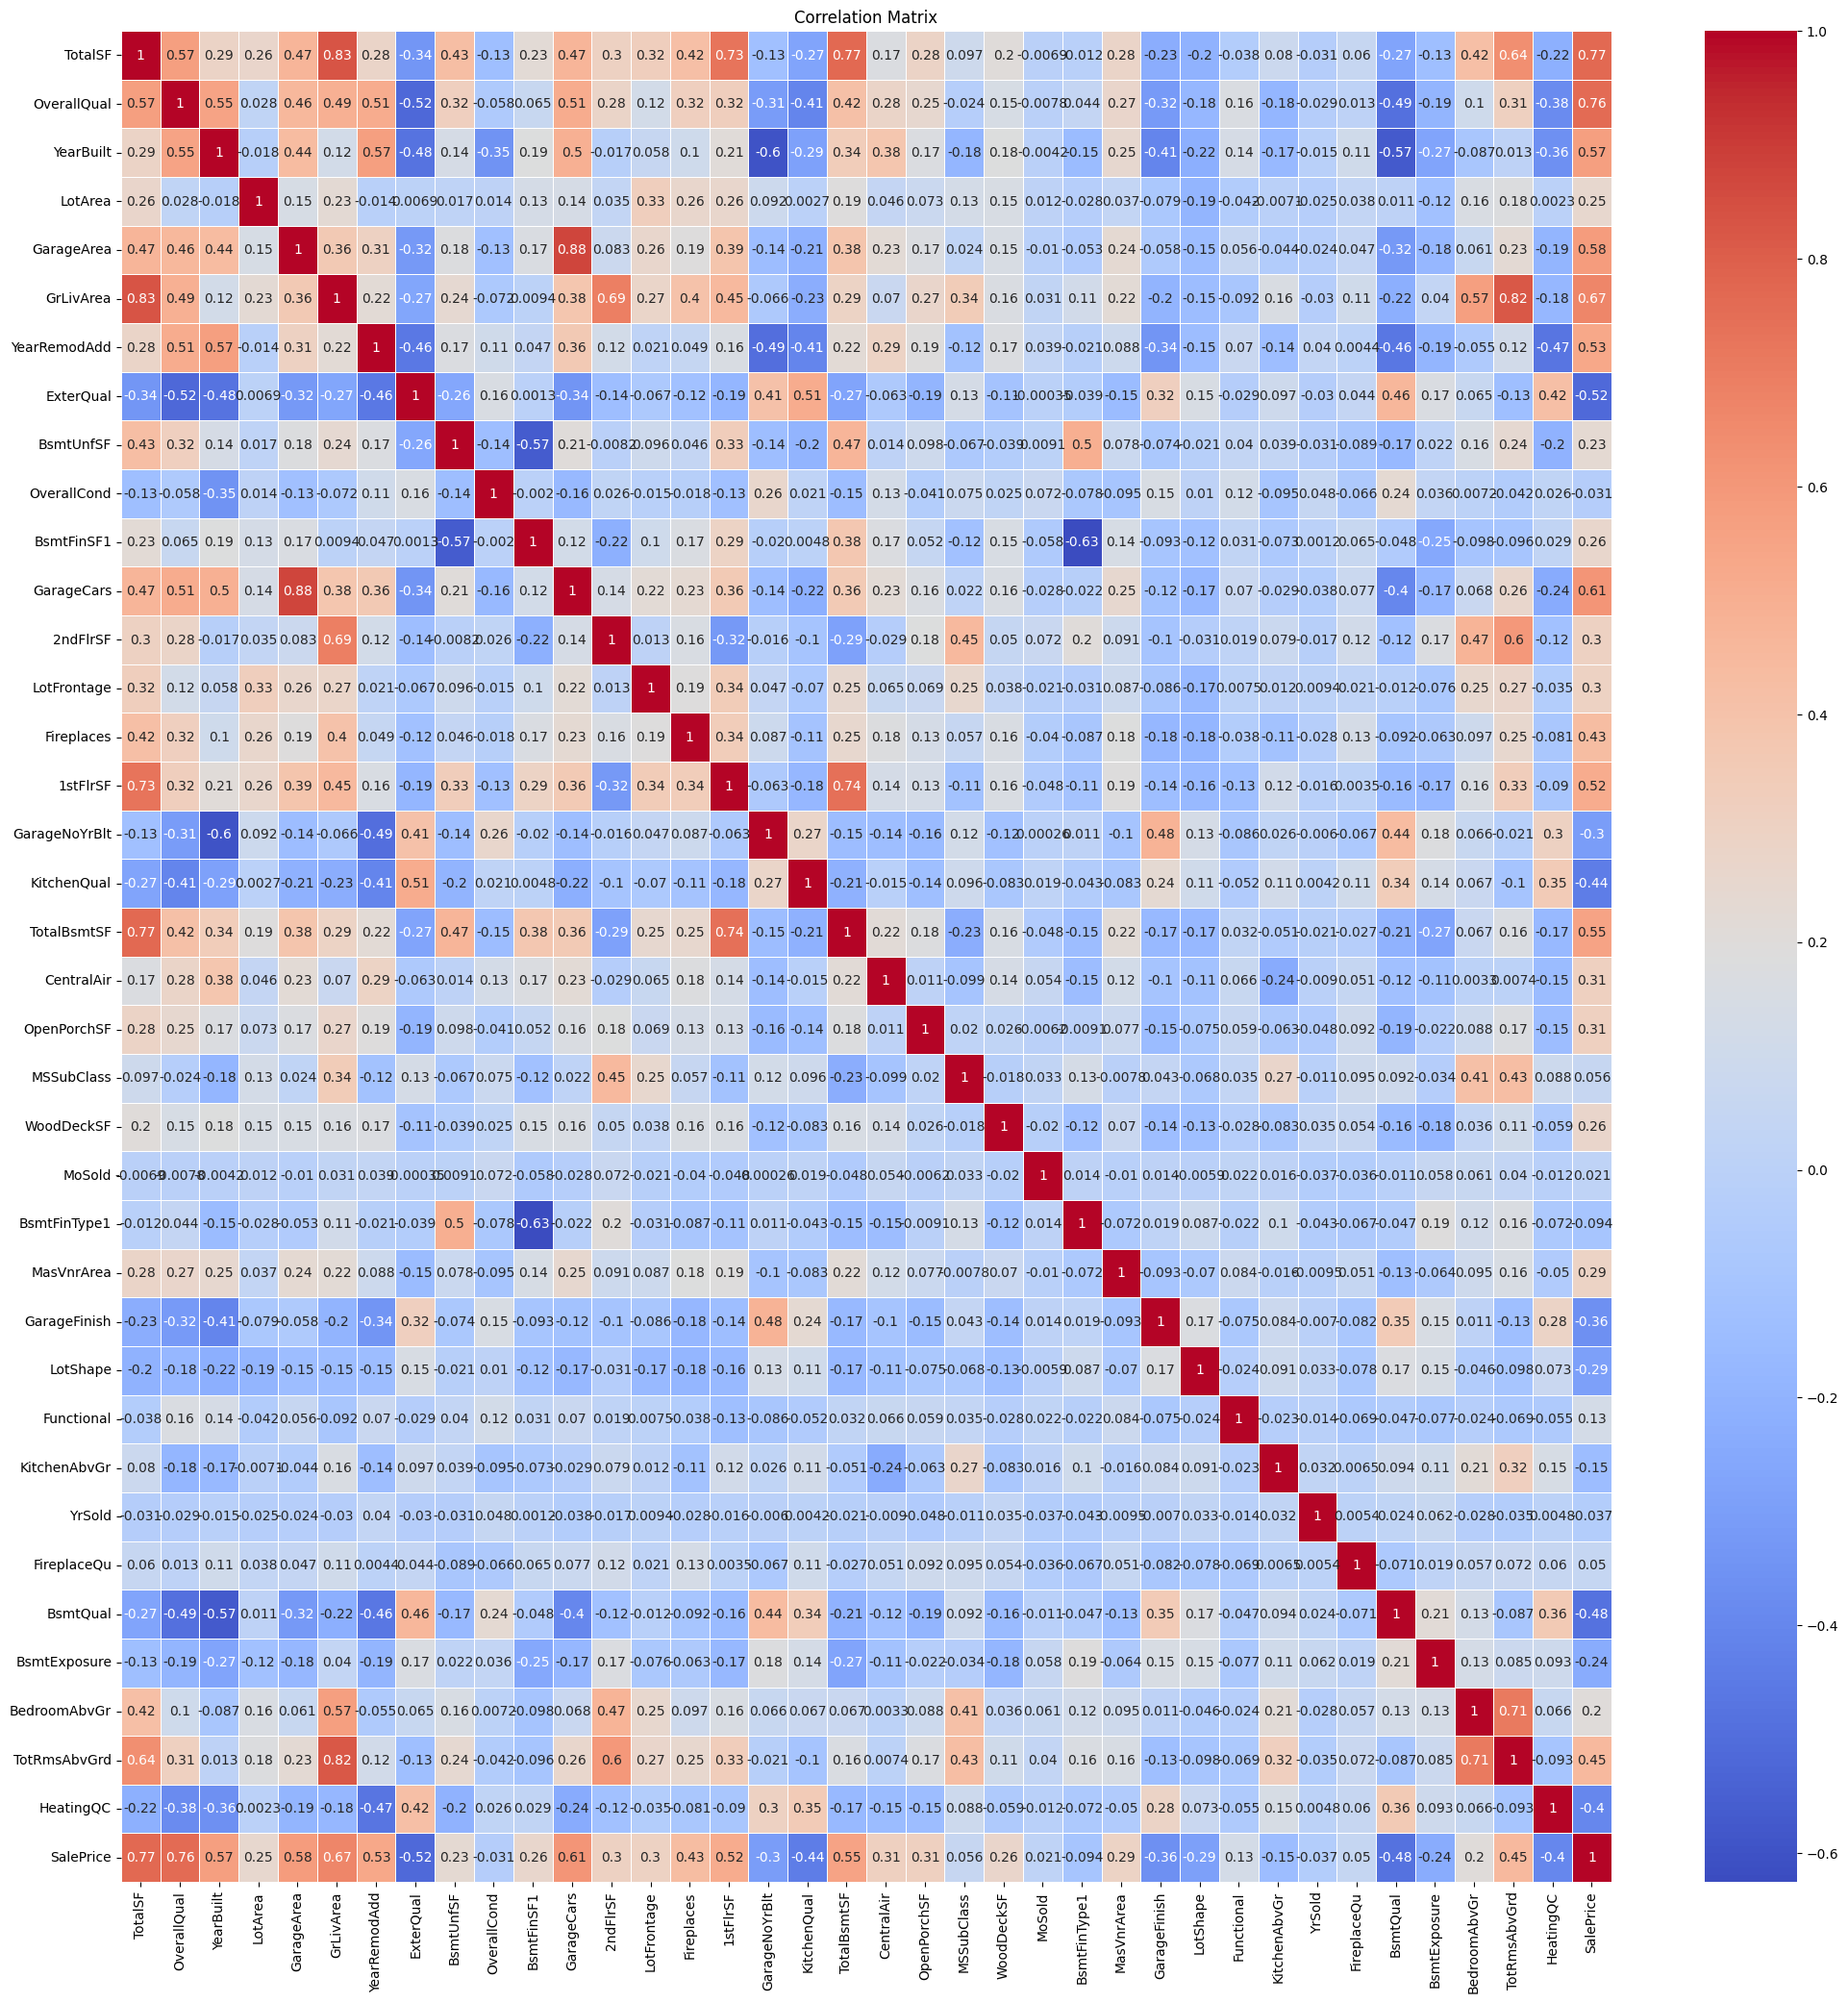

In [41]:
x = list(feature_importance_df_37['Feature'])
x = x + ['SalePrice']
corr_matrix = df_filtered[x].corr()

# Plot heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Create a DataFrame with correlation values for 'SalePrice', reset index, and rename columns
corr_num = pd.DataFrame(corr_matrix['SalePrice'].abs()).reset_index().rename({'index': 'Variable', 'SalePrice': 'Absolute_Correlation'}, axis=1)
print("Total Number of variables: ",len(corr_num))
corr_num

Total Number of variables:  38


Variable  Absolute_Correlation
0         TotalSF              0.769309
1     OverallQual              0.764499
2       YearBuilt              0.568748
3         LotArea              0.254420
4      GarageArea              0.581557
5       GrLivArea              0.665905
6    YearRemodAdd              0.533241
7       ExterQual              0.515052
8       BsmtUnfSF              0.233583
9     OverallCond              0.030919
10     BsmtFinSF1              0.258961
11     GarageCars              0.607290
12       2ndFlrSF              0.303652
13    LotFrontage              0.300300
14     Fireplaces              0.434976
15       1stFlrSF              0.516924
16  GarageNoYrBlt              0.301731
17    KitchenQual              0.439104
18    TotalBsmtSF              0.552391
19     CentralAir              0.312217
20    OpenPorchSF              0.313053
21     MSSubClass              0.056233
22     WoodDeckSF              0.263849
23         MoSold              0.021374
24   BsmtFinType1              0.094121
25     MasVnrArea              0.294931
26   GarageFinish              0.363398
27       LotShape              0.291647
28     Functional              0.129689
29   KitchenAbvGr              0.145636
30         YrSold              0.036890
31    FireplaceQu              0.050319
32       BsmtQual              0.483883
33   BsmtExposure              0.236303
34   BedroomAbvGr              0.202030
35   TotRmsAbvGrd              0.448578
36      HeatingQC              0.398825
37      SalePrice              1.000000

## Selecting Numerical Column based on Absolute Correlation

In [43]:
# Filter corr_num to include only rows with absolute correlation > 0.2
corr_final_var = corr_num[corr_num['Absolute_Correlation'] > 0.2]

# Print the length of the filtered DataFrame
print("Number of variables with absolute correlation > 0.2:", len(corr_final_var))

# Display the filtered DataFrame
corr_final_var

Number of variables with absolute correlation > 0.2: 30


Variable  Absolute_Correlation
0         TotalSF              0.769309
1     OverallQual              0.764499
2       YearBuilt              0.568748
3         LotArea              0.254420
4      GarageArea              0.581557
5       GrLivArea              0.665905
6    YearRemodAdd              0.533241
7       ExterQual              0.515052
8       BsmtUnfSF              0.233583
10     BsmtFinSF1              0.258961
11     GarageCars              0.607290
12       2ndFlrSF              0.303652
13    LotFrontage              0.300300
14     Fireplaces              0.434976
15       1stFlrSF              0.516924
16  GarageNoYrBlt              0.301731
17    KitchenQual              0.439104
18    TotalBsmtSF              0.552391
19     CentralAir              0.312217
20    OpenPorchSF              0.313053
22     WoodDeckSF              0.263849
25     MasVnrArea              0.294931
26   GarageFinish              0.363398
27       LotShape              0.291647
32       BsmtQual              0.483883
33   BsmtExposure              0.236303
34   BedroomAbvGr              0.202030
35   TotRmsAbvGrd              0.448578
36      HeatingQC              0.398825
37      SalePrice              1.000000

In [44]:
Finalise_Num_var_list = corr_final_var['Variable'].to_list()
Finalise_Num_var_list

['TotalSF',
 'OverallQual',
 'YearBuilt',
 'LotArea',
 'GarageArea',
 'GrLivArea',
 'YearRemodAdd',
 'ExterQual',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'GarageCars',
 '2ndFlrSF',
 'LotFrontage',
 'Fireplaces',
 '1stFlrSF',
 'GarageNoYrBlt',
 'KitchenQual',
 'TotalBsmtSF',
 'CentralAir',
 'OpenPorchSF',
 'WoodDeckSF',
 'MasVnrArea',
 'GarageFinish',
 'LotShape',
 'BsmtQual',
 'BsmtExposure',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'HeatingQC',
 'SalePrice']

<a id="CFeature_Selection"></a>
## <b><span style='color: black'>Step 4.4b |</span><span style='color:black'> Categorical Feature Selection</span></b>

In [45]:
categorical_features = df_filtered.select_dtypes(include = 'object')

Number of categorical features: 21


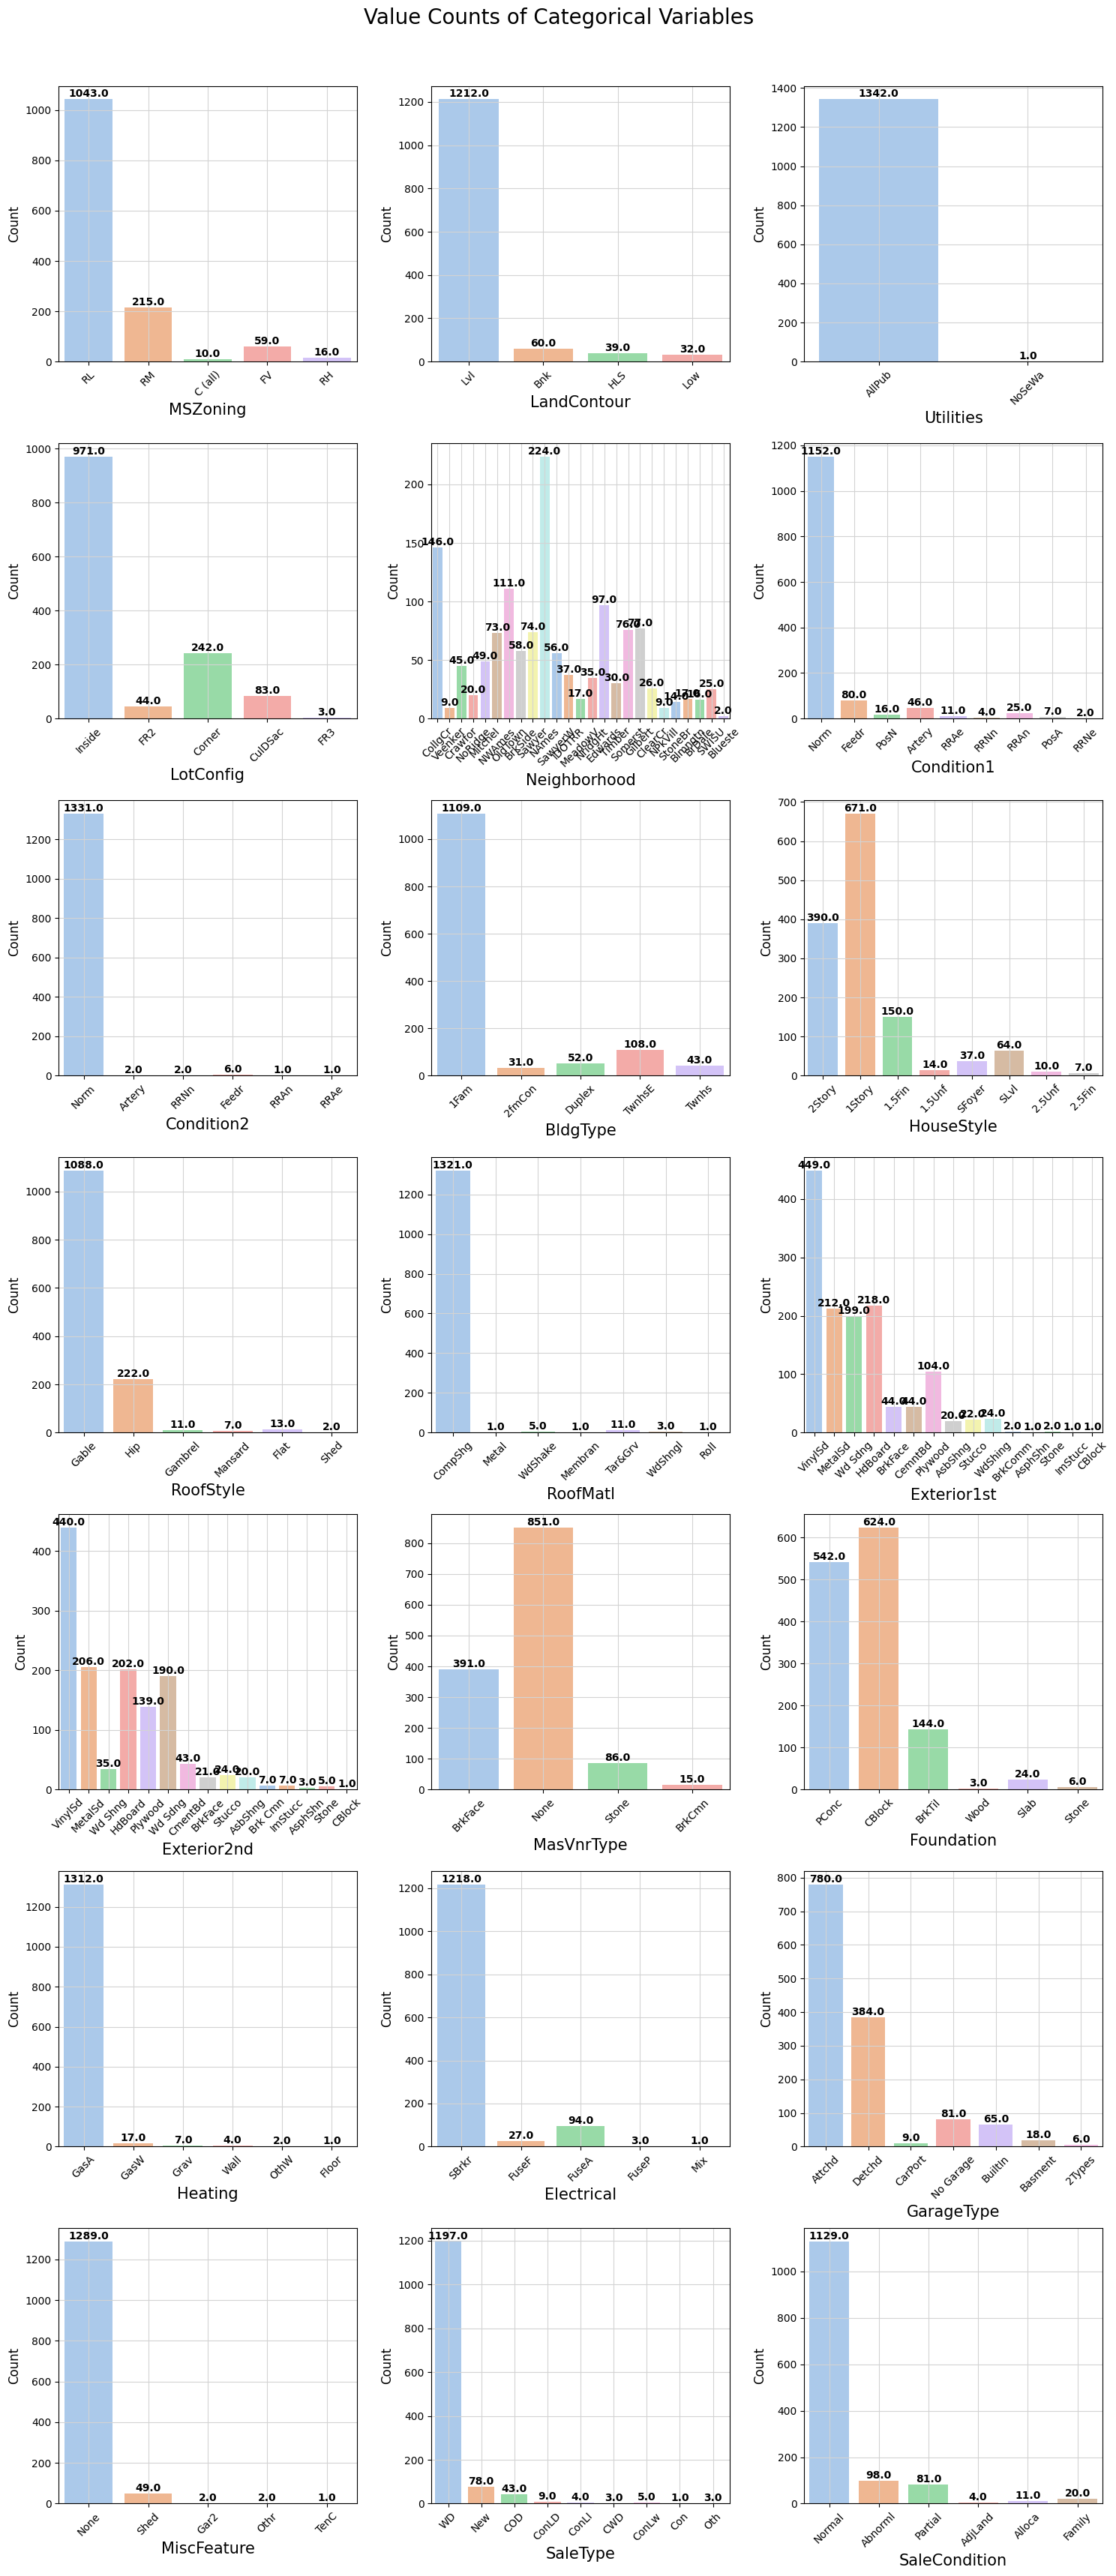

In [46]:
print('Number of categorical features:',len(categorical_features.columns))
# Calculate the number of rows and columns for the subplot grid
num_features = len(categorical_features.columns)
num_rows = math.ceil(num_features / 3)
num_cols = min(num_features, 3)

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Loop to plot value counts for each categorical feature
for i, col in enumerate(categorical_features.columns):
    x = i // num_cols
    y = i % num_cols

    # Plot value counts as a bar plot
    sns.countplot(data=categorical_features, x=col, ax=ax[x, y], palette='pastel')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].tick_params(axis='x', rotation=45)
    ax[x, y].grid(color='lightgrey')

    # Annotate bar plots with counts
    for p in ax[x, y].patches:
        ax[x, y].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=10, fontweight='bold')

# Hide empty subplots
for i in range(num_features, num_rows * num_cols):
    ax.flatten()[i].axis('off')

plt.suptitle('Value Counts of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.show()

In [47]:
categorical_features.columns

Index(['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

**More Feature Engineering for Categorical Data**

In [48]:
def process_categorical_columns(df):
    # Mapping for Exterior1st
    l = ['BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']
    df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'other' if x in l else x)

    # Mapping for HouseStyle
    l = ['1.5Unf', '2.5Unf', '2.5Fin']
    df['HouseStyle'] = df['HouseStyle'].apply(lambda x: 'other' if x in l else x)

    # Mapping for Heating
    df['Heating_GasA'] = df['Heating'].apply(lambda x: 'GasA' if x == 'GasA' else 'other')
    
     #Mapping for Electrical
    df['Electrical'] = df['Electrical'].apply(lambda x: 'SBrkr' if x == 'SBrkr' else 'other')

    # Mapping for RoofMatl
    df['RoofMatl_CompShg'] = df['RoofMatl'].apply(lambda x: 'CompShg' if x == 'CompShg' else 'other')

    # Creating MiscFeature_flag
    df['MiscFeature_flag'] = df['MiscFeature'].apply(lambda x: 0 if x == 'None' else 1)

    # Dropping unnecessary columns
    df.drop(['Utilities', 'Condition2', 'MiscFeature', 'Heating','RoofMatl'], axis=1, inplace = True)

# Usage
process_categorical_columns(df_filtered)

In [49]:
df_filtered.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPo

In [50]:
categorical_features = df_filtered.select_dtypes(include = 'object')
print('Number of categorical features:',len(categorical_features.columns))
categorical_features.columns

Number of categorical features: 18


Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Electrical', 'GarageType', 'SaleType',
       'SaleCondition', 'Heating_GasA', 'RoofMatl_CompShg'],
      dtype='object')

In [71]:
Outlier(df_filtered)

Number of outliers for each feature:
 MSSubClass            0
LotFrontage          94
LotArea              65
Street                6
Alley                91
LotShape              0
LandSlope            68
OverallQual           2
OverallCond         117
YearBuilt             6
YearRemodAdd          0
MasVnrArea          109
ExterQual            10
ExterCond           170
BsmtQual              0
BsmtCond            141
BsmtExposure        192
BsmtFinSF1            1
BsmtFinSF2          163
BsmtUnfSF            14
TotalBsmtSF          49
HeatingQC             0
CentralAir           95
1stFlrSF             18
2ndFlrSF              1
LowQualFinSF         25
GrLivArea            20
BsmtFullBath          1
BsmtHalfBath         79
FullBath              0
HalfBath              0
BedroomAbvGr         32
KitchenAbvGr         68
KitchenQual          41
TotRmsAbvGrd         15
Functional           97
Fireplaces            2
GarageFinish          0
GarageCars            5
GarageArea           10
Ga

In [53]:
df_filtered = df_filtered.drop(['BsmtFinType1','BsmtFinType2','FireplaceQu','EnclosedPorch','Fence_Flag'],axis=1)

**Converting categorical data using dummies:**

In [54]:
categorical_list = categorical_features.columns.tolist()
Final_df = pd.get_dummies(df_filtered, columns = categorical_list, dtype = int)

## Final Train Data

In [55]:
Final_df.shape

(1343, 184)

<a id="Prepare_test_data"></a> 
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 5 | <span style="color:black ; font-style: italic;"> Prepare test data:</span> 

<a id="Load_td"></a>
# <b><span style='color: black'>Step 5.1 |</span><span style='color:black'> Load Test Data:</span></b>

In [56]:
test = pd.read_csv(r"C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\house prediction\test.csv")
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0     1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence   
0            Lvl    AllPub  ...         120        0    NaN  MnPrv  \
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

<a id="Preprocess_td"></a>
# <b><span style='color: black'>Step 5.2 |</span><span style='color:black'> Preprocess Test Data:</span></b>

**Check Null Value in Test data**

In [57]:
Null_Values(test)

Number of null values in columns MSZoning 4
Number of null values in columns LotFrontage 227
Number of null values in columns Alley 1352
Number of null values in columns Utilities 2
Number of null values in columns Exterior1st 1
Number of null values in columns Exterior2nd 1
Number of null values in columns MasVnrType 894
Number of null values in columns MasVnrArea 15
Number of null values in columns BsmtQual 44
Number of null values in columns BsmtCond 45
Number of null values in columns BsmtExposure 44
Number of null values in columns BsmtFinType1 42
Number of null values in columns BsmtFinSF1 1
Number of null values in columns BsmtFinType2 42
Number of null values in columns BsmtFinSF2 1
Number of null values in columns BsmtUnfSF 1
Number of null values in columns TotalBsmtSF 1
Number of null values in columns BsmtFullBath 2
Number of null values in columns BsmtHalfBath 2
Number of null values in columns KitchenQual 1
Number of null values in columns Functional 2
Number of null valu

<a id="DT_Preprocess_td"></a>
## <b><span style='color: black'>Step 5.2a |</span><span style='color:black'> Data Cleaning of Test Data:</span></b>

In [58]:
# Drop 'Id' and 'PoolQC' columns
test_data = test.drop(['Id', 'PoolQC'], axis=1)

# Apply preprocessing steps for Basement and Garage columns
Basement(test_data)
Garage(test_data)

# Fill missing values in the dataset
fill_missing_values(test_data)

# Fill null columns with mode
def fill_null_columns(df):
    null_columns = df.columns[df.isnull().any()].tolist()
    for col in null_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

fill_null_columns(test_data)

# Preprocess data
preprocess_data(test_data)

# Process categorical columns
process_categorical_columns(test_data)

# Check for null values after preprocessing
Null_Values(test_data)

Number of Null values in FireplaceQu: 730
Values in  FireplaceQu
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: count, dtype: int64

Values in Fireplaces columns where FireplaceQu is Null: Fireplaces
0    730
Name: count, dtype: int64
No Null columns


In [59]:
test_data.shape

(1459, 77)

<a id="LE_Preprocess_td"></a>
## <b><span style='color: black'>Step 5.2b |</span><span style='color:black'> Label Encoding and Creating Dummy Variables for Categorical Test Data:</span></b>

In [60]:
# Label Encoding Dummy Variables for Categorical Test Data
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test_data[c].values)) 
    test_data[c] = lbl.transform(list(test_data[c].values))

# shape        
print('Shape all_data: {}'.format(test_data.shape))
numerical_features_td = test_data.select_dtypes(include = 'number')
numerical_features_td.columns

Shape all_data: (1459, 77)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Fence_Flag', 'TotalSF', 'GarageNoYrBlt',
       'MiscFeature_flag'],
      dtype='object')

In [66]:
test_data = test_data.drop(['BsmtFinType1','BsmtFinType2','FireplaceQu','EnclosedPorch','Fence_Flag'],axis=1)
# Creating Dummy Variables for Categorical Test Data
categorical_features_td = test_data.select_dtypes(include = 'object').columns.tolist()
Finalise_Test_data = pd.get_dummies(test_data, columns = categorical_features_td, dtype = int)
Finalise_Test_data.shape

(1459, 183)

<a id="CD_Preprocess_td"></a>
## <b><span style='color: black'>Step 5.2c |</span><span style='color:black'> Check Column Differences Between Test and Train Data</span></b>

In [67]:
columns_only_in_df = list(set(df_filtered.columns) - set(test_data.columns))
columns_only_in_df

['SalePrice']

In [68]:
columns_only_in_df = list(set(Final_df.columns) - set(Finalise_Test_data.columns))
columns_only_in_df

['SalePrice']

<a id="mb"></a>    
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 6 | <span style="color:black ; font-style: italic;"> Model Building:</span> 

<a id="num_statistics"></a>
## <b><span style='color: black'>Step 6 |</span><span style='color:black'> Hyperparameter tuning of a linear regression model</span></b>

**Hyperparameter tuning for a linear regression model typically involves searching for the best combination of hyperparameters that improves the model's performance. However, linear regression has fewer hyperparameters compared to other models like random forests or gradient boosting.**

In [69]:
# Assuming your data is in a DataFrame named Final_df with 'SalePrice' as the target
X_train = Final_df.drop(columns=['SalePrice'])
y_train = Final_df['SalePrice']
X_test = Finalise_Test_data

# Step 2: Set up the pipeline and parameter grid
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', LinearRegression())  # Placeholder for the model
])

param_grid = [
    {'model': [LinearRegression()]},
    {'model': [Ridge()], 'model__alpha': [0.1, 1.0, 10.0, 100.0]},
    {'model': [Lasso()], 'model__alpha': [0.1, 1.0, 10.0, 100.0]}
]

# Step 3: Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best model: {best_model}")
print(f"Best parameters: {best_params}")

# Step 4: Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Convert predictions to a DataFrame and rename the column to 'Predict'
X_test_score = pd.DataFrame(y_pred, columns=['Predict'])

# Ensure the Id column from the test DataFrame is aligned with the predictions
result = pd.DataFrame({'Id': test['Id'], 'SalePrice': X_test_score['Predict']})

Best model: Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=100.0))])
Best parameters: {'model': Lasso(alpha=100.0), 'model__alpha': 100.0}


<a id="mpr"></a>    
<span style="font-family:cursive; font-size:36px;box-shadow: black  0px 3px 15px; padding:8px 16px; border-radius:10px; border: 2px solid black; font-weight:bold; text-shadow: 2px 2px 5px rgba(4, 2, 0, 0.5); color:;"> 7 | <span style="color:black ; font-style: italic;"> Model Prediction Result:</span> 

In [70]:
# Display the resulting DataFrame
result

Id      SalePrice
0     1461  123139.519347
1     1462  158684.916093
2     1463  182015.424501
3     1464  194195.853058
4     1465  193979.152122
...    ...            ...
1454  2915   78031.801347
1455  2916   69153.602176
1456  2917  170365.104602
1457  2918  116590.043249
1458  2919  217662.737450

[1459 rows x 2 columns]

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">
<h2 align="left"><font color=black>Conclusion:</font></h2>
    
"In this analysis, we followed a systematic approach to explore, preprocess, and model the dataset for house price prediction. We began by importing necessary libraries and reading the dataset, followed by an overview of the dataset's basic information and summary statistics for both numerical and categorical variables. Subsequently, we conducted data preprocessing tasks such as cleaning, feature engineering, outlier removal, and feature selection. Additionally, we prepared the test data by loading and preprocessing it accordingly. Moving on, we built a predictive model using the prepared data, and finally, we evaluated the model's performance and made predictions. This structured methodology ensures a comprehensive understanding of the data and facilitates accurate predictions in the domain of house price prediction."

<h3 align="left"><font color='black'>Thank You</font><br><font color='black'>Best Regard!<br>Akshat Rajawat</font></h3>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">
<h2 align="left"><font color=black>Achivement:</font></h2>
    
Kaggle competition score of 0.14810 and a leaderboard rank top 55% (2559)